In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/accuracy-averages-classes.csv')

In [3]:
df['Average'] = df[['Boat', 'Dog', 'Person', 'Plant', 'Wheel']].mean(axis=1)

In [4]:
plot_frame = df[['Iteration', 'Average']]

# Shift the 'Average' column by 1
plot_frame['Prev_Average'] = plot_frame['Average'].shift(1)

# Calculate the improvement
plot_frame['Improvement'] = (plot_frame['Average'] - plot_frame['Prev_Average']) / plot_frame['Prev_Average'] * 100

# Drop the prev avg as it's no longer needed
plot_frame = plot_frame.drop(columns=['Prev_Average'])

/var/folders/p2/fzy79l457_dc68k1scfkg2qw0000gn/T/ipykernel_23816/1185480454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_frame['Prev_Average'] = plot_frame['Average'].shift(1)
/var/folders/p2/fzy79l457_dc68k1scfkg2qw0000gn/T/ipykernel_23816/1185480454.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_frame['Improvement'] = (plot_frame['Average'] - plot_frame['Prev_Average']) / plot_frame['Prev_Average'] * 100


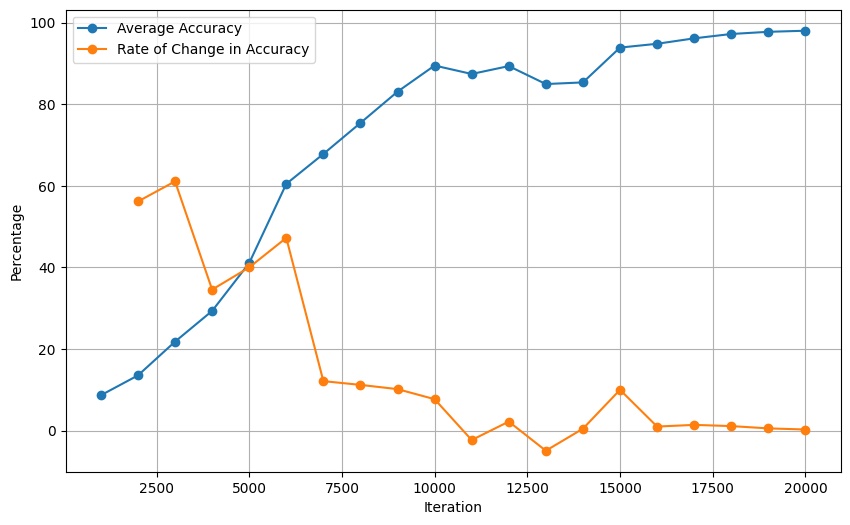

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(plot_frame['Iteration'], plot_frame['Average'], label='Average Accuracy', marker='o')

plt.plot(plot_frame['Iteration'], plot_frame['Improvement'], label='Rate of Change in Accuracy', marker='o')

plt.xlabel('Iteration')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

export_path = '../Data/accuracy-improvement-graph.png'
plt.savefig(export_path, dpi=300)

plt.show()